In [15]:
import h5py as h
import numpy as np
import pylab as mplot
import astropy.io.fits as pf
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/global/common/software/lsst/common/miniconda/py3-4.5.12/envs/stack/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [16]:
nofz_file = h.File('/global/homes/c/chihway/txpipe-reanalysis/data/example/outputs/photoz_stack.hdf5','r')

In [17]:
nofz_file['n_of_z/source'].keys()

<KeysViewHDF5 ['bin_0', 'bin_1', 'bin_2', 'bin_3', 'z']>

In [25]:
desy1 = pf.open('/global/projecta/projectdirs/lsst/groups/WL/projects/wl-txpipe-hack/DESY1/2pt_NG_mcal_1110.fits')
print(desy1[1].header)

XTENSION= 'IMAGE   '           / Image extension                                BITPIX  =                  -64 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                  900                                                  NAXIS2  =                  900                                                  PCOUNT  =                    0 / number of parameters                           GCOUNT  =                    1 / number of groups                               COVDATA =                    T                                                  EXTNAME = 'COVMAT  '                                                            STRT_0  =                    0                                                  NAME_0  = 'xip     '                                                            STRT_1  =                  200                                                  NAME_1  = 'xim     '                    

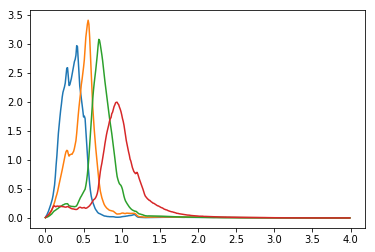

In [26]:
for i in range(4):
    mplot.plot(desy1[6].data['Z_LOW'], desy1[6].data['BIN'+str(i+1)])

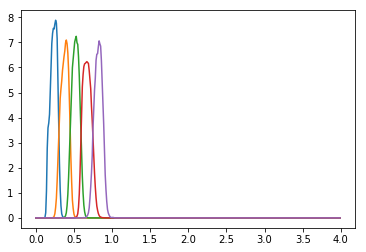

In [27]:
for i in range(5):
    mplot.plot(desy1[7].data['Z_LOW'], desy1[7].data['BIN'+str(i+1)])

In [32]:
f = h.File('/global/homes/c/chihway/txpipe-reanalysis/data/desy1/outputs/photoz_stack.hdf5', 'w')
f.create_group('n_of_z')
g1 = f.create_group('n_of_z/lens')
g1.create_dataset('z', data=desy1[7].data['Z_MID'], dtype=desy1[7].data['Z_MID'].dtype)
for i in range(5):
    g1.create_dataset('bin_'+str(i), data=desy1[7].data['BIN'+str(i+1)], dtype=desy1[7].data['BIN'+str(i+1)].dtype)

g2 = f.create_group('n_of_z/source')
g2.create_dataset('z', data=desy1[6].data['Z_MID'], dtype=desy1[6].data['Z_MID'].dtype)
for i in range(4):
    g2.create_dataset('bin_'+str(i), data=desy1[6].data['BIN'+str(i+1)], dtype=desy1[6].data['BIN'+str(i+1)].dtype)

f.create_group('n_of_z/source2d')
f.create_group('provenance')

f.close()

In [33]:
f = h.File('/global/homes/c/chihway/txpipe-reanalysis/data/desy1/outputs/photoz_stack.hdf5', 'r')
f['n_of_z'].keys()

<KeysViewHDF5 ['lens', 'source', 'source2d']>